In [ ]:
# Assignment - 1
# Lanke Payal Sambhaji
# TY - B - 152

In [33]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [34]:
# Load Dataset (Robust Data Ingestion)

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
# Convert target to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [37]:
# Handle Categorical Features
X = pd.get_dummies(X, drop_first=True)

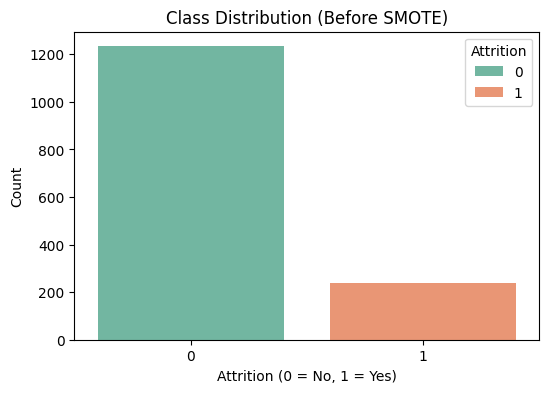

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [38]:
# Exploratory Analysis of Class Distribution Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='Set2',hue=y)
plt.title("Class Distribution (Before SMOTE)")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(y.value_counts(normalize=True))


In [39]:
# Train–Test Split (Prevent Data Leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [40]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
# Model BEFORE SMOTE 
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy BEFORE SMOTE:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy BEFORE SMOTE: 0.8668478260869565
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       309
           1       0.65      0.37      0.47        59

    accuracy                           0.87       368
   macro avg       0.77      0.67      0.70       368
weighted avg       0.85      0.87      0.85       368



In [42]:
# Apply SMOTE (Training Data Only)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

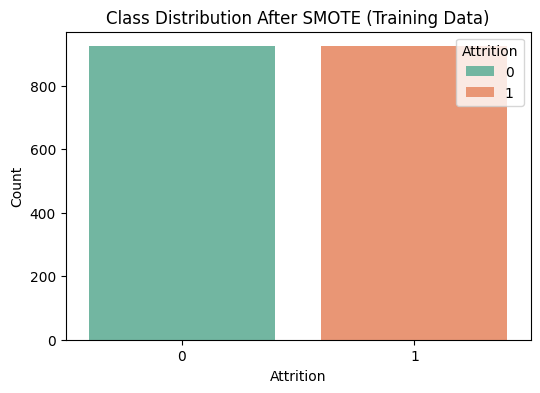

In [43]:
# Visualize Class Distribution AFTER SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_smote,palette='Set2',hue=y_train_smote)
plt.title("Class Distribution After SMOTE (Training Data)")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [44]:
# Model AFTER SMOTE
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test_scaled)


In [45]:
# Display Results (Accuracy + Precision/Recall)
print("Accuracy AFTER SMOTE:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Accuracy AFTER SMOTE: 0.782608695652174
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       309
           1       0.39      0.61      0.47        59

    accuracy                           0.78       368
   macro avg       0.65      0.71      0.67       368
weighted avg       0.83      0.78      0.80       368



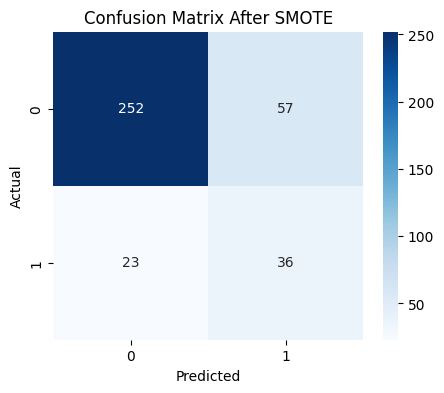

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After SMOTE")
plt.show()
